In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,  Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [28]:
train = pd.read_csv("real_full.csv", encoding="utf-8", index_col=0)
test = pd.read_csv("test.csv", encoding="utf-8", index_col=0)
submission = pd.read_csv("sample_submission.csv", encoding="utf-8", index_col=0)

In [29]:
x_train = train.values[:,:113]
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_train.shape

(78587, 1, 113)

In [30]:
y_train = train.values[:, 113:]
y_train.shape
print(y_train.shape)

(78587, 12)


In [31]:
x_test = test.values[:,:113]
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
x_test.shape

(10000, 1, 113)

In [ ]:
##adam으로 선택한 이유 
#An improvement of the convergence proof of the ADAM-Optimizer, Sebastian Bock, Josef Goppold, Martin Weiß 논문 참고


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 128)            123904    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 12)               

In [ ]:
##SGD(Stochastic Gradient Descent), adam, RMSprop 성능비교

In [32]:
model = Sequential()
model.add(LSTM(128, input_shape = (1, 113), return_sequences=True))
model.add(LSTM(128, return_sequences=False))

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(12, activation = "linear"))

tf.random.set_seed(0)
model2 = tf.keras.models.clone_model(model)

tf.random.set_seed(0)
model3 = tf.keras.models.clone_model(model)

In [33]:
losses=tf.compat.v1.losses.log_loss
model.compile(loss='mse', optimizer='SGD')
model2.compile(loss='mse', optimizer='Adam')
model3.compile(loss='mse', optimizer='RMSprop')

In [34]:
hist_model = model.fit(x_train, y_train,
                       epochs = 100,
                       batch_size = 256,
                       verbose = 2, 
                       validation_split=0.2)

hist_model2 = model2.fit(x_train, y_train,
                       epochs = 100,
                       batch_size = 256,
                       verbose = 2, 
                       validation_split=0.2)

hist_model3 = model3.fit(x_train, y_train,
                       epochs = 100,
                       batch_size = 256,
                       verbose = 2, 
                       validation_split=0.2)


Train on 62869 samples, validate on 15718 samples
Epoch 1/100
62869/62869 - 4s - loss: 5102.6088 - val_loss: 3641.4765
Epoch 2/100
62869/62869 - 2s - loss: 3669.6546 - val_loss: 2758.9364
Epoch 3/100
62869/62869 - 2s - loss: 3078.1664 - val_loss: 2370.5852
Epoch 4/100
62869/62869 - 2s - loss: 2803.9715 - val_loss: 2198.3265
Epoch 5/100
62869/62869 - 2s - loss: 2687.2111 - val_loss: 2122.2117
Epoch 6/100
62869/62869 - 2s - loss: 2635.7377 - val_loss: 2088.4847
Epoch 7/100
62869/62869 - 2s - loss: 2613.0477 - val_loss: 2073.3937
Epoch 8/100
62869/62869 - 2s - loss: 2602.9875 - val_loss: 2066.6762
Epoch 9/100
62869/62869 - 2s - loss: 2598.5836 - val_loss: 2063.6753
Epoch 10/100
62869/62869 - 2s - loss: 2596.6661 - val_loss: 2062.3456
Epoch 11/100
62869/62869 - 2s - loss: 2595.8332 - val_loss: 2061.7319
Epoch 12/100
62869/62869 - 2s - loss: 2595.4590 - val_loss: 2061.4325
Epoch 13/100
62869/62869 - 2s - loss: 2595.2957 - val_loss: 2061.2974
Epoch 14/100
62869/62869 - 2s - loss: 2595.2293 -

Epoch 17/100
62869/62869 - 2s - loss: 2071.4922 - val_loss: 1491.1730
Epoch 18/100
62869/62869 - 2s - loss: 2054.5937 - val_loss: 1480.7832
Epoch 19/100
62869/62869 - 2s - loss: 2050.9901 - val_loss: 1452.8333
Epoch 20/100
62869/62869 - 2s - loss: 2031.0661 - val_loss: 1472.1691
Epoch 21/100
62869/62869 - 2s - loss: 2030.3419 - val_loss: 1453.1786
Epoch 22/100
62869/62869 - 2s - loss: 2016.3475 - val_loss: 1457.0746
Epoch 23/100
62869/62869 - 2s - loss: 2037.7246 - val_loss: 1459.3668
Epoch 24/100
62869/62869 - 2s - loss: 2026.8029 - val_loss: 1489.4423
Epoch 25/100
62869/62869 - 2s - loss: 2012.4248 - val_loss: 1458.7688
Epoch 26/100
62869/62869 - 2s - loss: 2016.1037 - val_loss: 1433.0462
Epoch 27/100
62869/62869 - 2s - loss: 2003.5890 - val_loss: 1438.6863
Epoch 28/100
62869/62869 - 2s - loss: 1974.7210 - val_loss: 1352.0758
Epoch 29/100
62869/62869 - 2s - loss: 1938.3706 - val_loss: 1366.9986
Epoch 30/100
62869/62869 - 2s - loss: 1909.8275 - val_loss: 1273.4685
Epoch 31/100
62869/6

Epoch 34/100
62869/62869 - 2s - loss: 1957.4614 - val_loss: 1334.4160
Epoch 35/100
62869/62869 - 2s - loss: 1954.4217 - val_loss: 1448.0549
Epoch 36/100
62869/62869 - 2s - loss: 1952.5810 - val_loss: 1396.5908
Epoch 37/100
62869/62869 - 2s - loss: 1943.4132 - val_loss: 1469.1639
Epoch 38/100
62869/62869 - 2s - loss: 1943.3649 - val_loss: 1259.8014
Epoch 39/100
62869/62869 - 2s - loss: 1924.7991 - val_loss: 1291.5047
Epoch 40/100
62869/62869 - 2s - loss: 1921.0720 - val_loss: 1419.4405
Epoch 41/100
62869/62869 - 2s - loss: 1915.8024 - val_loss: 1386.8206
Epoch 42/100
62869/62869 - 2s - loss: 1907.8866 - val_loss: 1263.9046
Epoch 43/100
62869/62869 - 2s - loss: 1889.3746 - val_loss: 1288.5816
Epoch 44/100
62869/62869 - 2s - loss: 1885.7356 - val_loss: 1922.4407
Epoch 45/100
62869/62869 - 2s - loss: 1883.8061 - val_loss: 1206.6764
Epoch 46/100
62869/62869 - 2s - loss: 1885.1667 - val_loss: 1192.8251
Epoch 47/100
62869/62869 - 2s - loss: 1877.8862 - val_loss: 1343.6500
Epoch 48/100
62869/6

new(max-min)+min

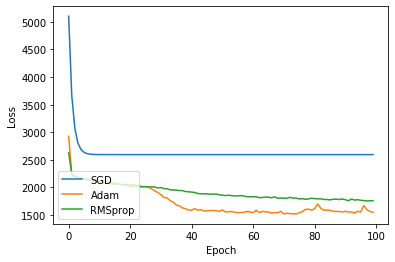

In [39]:
loss = hist_model.history['loss']
loss2 = hist_model2.history['loss']
loss3 = hist_model3.history['loss']
plt.plot(loss, label='SGD')
plt.plot(loss2, label='Adam')
plt.plot(loss3, label='RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.show()

In [20]:
losses=tf.compat.v1.losses.log_loss
model.compile(loss = 'mse', optimizer='adam')

In [19]:
model = Sequential()
model.add(LSTM(128, input_shape = (1, 113), return_sequences=True))
model.add(LSTM(128, return_sequences=False))

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(12, activation = "linear"))



In [22]:
hist_model = model.fit(x_train, y_train,
                       epochs = 100,
                       batch_size = 256,
                       verbose = 2, 
                       validation_split=0.2)

Train on 62869 samples, validate on 15718 samples
Epoch 1/100
62869/62869 - 4s - loss: 2892.9408 - val_loss: 1608.2590
Epoch 2/100
62869/62869 - 2s - loss: 2220.1951 - val_loss: 1585.8611
Epoch 3/100
62869/62869 - 2s - loss: 2209.1832 - val_loss: 1575.4298
Epoch 4/100
62869/62869 - 2s - loss: 2201.6846 - val_loss: 1583.3436
Epoch 5/100
62869/62869 - 2s - loss: 2168.9862 - val_loss: 1565.1578
Epoch 6/100
62869/62869 - 2s - loss: 2152.7657 - val_loss: 1551.1355
Epoch 7/100
62869/62869 - 2s - loss: 2137.3584 - val_loss: 1614.3054
Epoch 8/100
62869/62869 - 2s - loss: 2157.0932 - val_loss: 1597.8431
Epoch 9/100
62869/62869 - 2s - loss: 2143.0763 - val_loss: 1567.4739
Epoch 10/100
62869/62869 - 2s - loss: 2130.6682 - val_loss: 1562.2523
Epoch 11/100
62869/62869 - 2s - loss: 2123.5939 - val_loss: 1535.8297
Epoch 12/100
62869/62869 - 2s - loss: 2106.5067 - val_loss: 1536.0757
Epoch 13/100
62869/62869 - 2s - loss: 2085.0598 - val_loss: 1513.2668
Epoch 14/100
62869/62869 - 2s - loss: 2087.4941 -

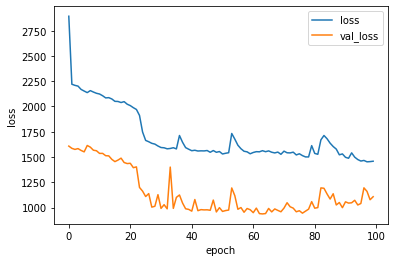

In [23]:
plt.plot(hist_model.history["loss"], label="loss")
plt.plot(hist_model.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend();

In [24]:
pred = model.predict(x_test)
submission = pd.DataFrame(data=pred, columns=submission.columns, index=submission.index)
submission.to_csv('submission.csv')